[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/045_cv_tareas/cv_tareas.ipynb)

## Tareas de Visión Artificial

La visión artificial, visión por computador o *computer vision* (CV) se define como la disciplina científica que se encarga del análisis y extracción de información de imágenes y vídeos. Como puedes imaginar, este campo tiene multitud de aplicaciones interesantes: conducción autónoma, sistemas de diagnóstico médico, robótica, videojuegos, etc. Multitud de algoritmos para diferentes tareas de visión artificial han sido desarrollados y aplicados con éxito durante las últimas décadas, sin embargo el resurgimiento de las `redes neuronales` (en particular las `redes neuronales convolucionales`) y su éxito en el campo de la visión artifical ha dado como resultado avances importantes en muchas aplicaciones e incluso la aparición de nuevas tareas anteriormente inconcebibles. En este post vamos a presentar algunas de las tareas de visión artificial más comunes que podemos resolver con `deep learning`, y en futuros posts iremos viendo como podemos llevarlas a cabo una a una.  

## Tipos de tareas

Existen muchísimas tareas en el campo de la visión artificial: desde tareas tan simples como clasificar una imagen hasta otras más exóticas como coloreas un imagen en blanco y negro o aumentar la resolución de una imagen. Puedes encontrar una lista de tareas, junto a ejemplos de implementación, en [paperswithcode](https://paperswithcode.com/area/computer-vision). En este post vamos a presentar las tareas más simples que nos van a servir de introducción para aprender a resolver tareas de visión artificial con redes neuronales. Los conceptos aprendidos nos servirán para poder resolver tareas más complicadas en el futuro.

![](https://miro.medium.com/proxy/1*nR5QCdmqUnvU2JFBu2Xa-Q.png)

### Clasificación

La tarea de clasificación de imágenes es la más sencilla, y de hecho ya la hemos llevado a cabo en varios posts anteriores. En esta tarea, nuestra red neuronal recibe una imagen a la entrada y a la salida nos dará una distribución de probabilidad sobre todas las clases que consideremos. 

![](https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif)

### Localización

En la tarea de localización, nuestra red neuronal será responsable de darnos 4 valores a la salida. Estos 4 valores representan una caja, o *bounding box*, que encierra al objeto principal presente en la imagen. Si comibamos esta tarea con la de clasificación, no sólo seremos capaces de reconocer un objeto sino de conocer también en qué posición se encuentra dentro de la imagen. 

### Detección de Objetos

Si bien en la tarea de localización + clasificación podemos detectar el principal objeto presente en la imagen, la tarea de detección de objetos nos va a permitir detectar un número indeterminado de objetos en la imagen y no sólo uno. Esta es una de las principales tareas llevadas a cabo por los coches autónomos, que necesitan identificar y localizar en el espacio a otros coches, peatones, ciclistas, semáforos, señales de tráfico, etc. 

![](https://thumbs.gfycat.com/SociableAmazingApe-size_restricted.gif)

### Segmentación

Esta tarea es similar que la de clasificación pero llevada al extremos. Si bien en la tarea de clasificación asignamos una etiqueta a la imagen, en la tarea de segmentación se asigna una etiqueta a cada uno de los píxeles de la imagen. Así pues, la red neuronal nos dará a la salida otra imagen (con la misma resolución que la imagen de la entrada) en la que tenemos una clase asignada a cada pixel. Si nuestra red permite, además, reconocer diferentes objetos de la misma categoría, hablamos de `segmentación semántica`.

![](https://thumbs.gfycat.com/DimSarcasticCockerspaniel-size_restricted.gif)

## Ejemplo de Clasificación

Vamos a ver ahora un ejemplo de clasificación de imagen utilizando `redes neuronales`. Cómo ya hemos comentado anteriormente, tienes muchos ejemplos de esta tarea en posts anteriores. Aquí vamos a ver cómo clasificar imágenes con el dataset MNIST utilizando `Pytorch`. 

En primer lugar vamos a descargar el dataset utilizando la librería `torchvision`, que nos ofrece datasets, modelos, transformaciones y operaciones comunes en el campo de la visión artificial.

In [1]:
import torch
import torchvision

dataset = {
    'train': torchvision.datasets.MNIST('./data', train=True, download=True, transform=torchvision.transforms.ToTensor()),
    'test': torchvision.datasets.MNIST('./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
}

len(dataset['train']), len(dataset['test'])

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(60000, 10000)

En cualquier tarea de visión artificial es recomendable visualizar ejemplos de imágenes en el dataset para hacernos una idea del tipo de datos con el que trabajamos y las diferentes categorías.

In [2]:
dataset['train'].class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

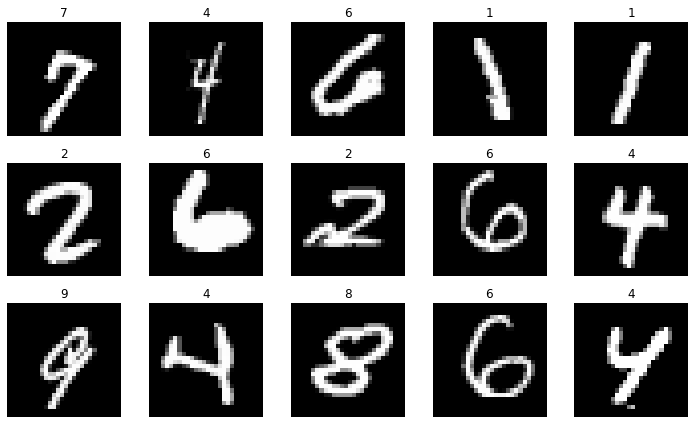

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['train'])-1)
        img, label = dataset['train'][ix]
        plt.imshow(img.squeeze(0), cmap='gray')
        plt.axis("off")
        plt.title(label)
plt.tight_layout()
plt.show()

In [ ]:
len(img)

1

In [ ]:
img.shape, img.dtype, img.max(), img.min()

(torch.Size([1, 28, 28]), torch.float32, tensor(1.), tensor(0.))

Como puedes ver tenemos imágenes de dígitos manuscritos, y el objetivo es el da asignar una etiqueta a cada imagen que corresponda con el dígito presente en ella. Esto lo conseguimos haciendo que nuestra red neuronal nos de 10 valores a la salida, que representa una distribución de probabilidad sobre todas las clases. Dada una imagen, le asignaremos la etiqueta correspondiente al valor más grande a la salida.

In [ ]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc = torch.nn.Linear(128*7*7, n_outputs)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

In [ ]:
model = CNN()
output = model(torch.randn(64, 1, 28, 28))
output.shape

torch.Size([64, 10])

> 💡 En posts anteriores hemos hablado en detalle sobre `redes neuronales convolucionales`, así que si no entiendes bien lo que estamos haciendo en el modelo anterior te recomendamos que les eches un vistazo.

Durante el entrenamiento de nuestra red compararemos la salida del modelo con la etiqueta real utilizando una función de pérdida de tipo *CrossEntropy* y actualizaremos los pesos de forma que el error se reduzca tras cada iteración.

![](https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-size_restricted.gif)

In [ ]:
from tqdm import tqdm
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=64, shuffle=False, pin_memory=True)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 1, 28, 28])

In [ ]:
dataloader['train']

In [ ]:
model = CNN()
fit(model, dataloader)

loss 0.05969 acc 0.98524:   1%|▍                                      | 10/938 [00:00<00:09, 93.46it/s]

Epoch 1/5 loss 0.14863 val_loss 0.04669 acc 0.95477 val_acc 0.98537


loss 0.02348 acc 0.99121:   1%|▍                                       | 9/938 [00:00<00:10, 90.00it/s]

Epoch 2/5 loss 0.04513 val_loss 0.04099 acc 0.98607 val_acc 0.98607


loss 0.01917 acc 0.99306:   1%|▍                                      | 10/938 [00:00<00:09, 98.04it/s]

Epoch 3/5 loss 0.03252 val_loss 0.04034 acc 0.98981 val_acc 0.98656


loss 0.01199 acc 0.99589:   1%|▍                                     | 11/938 [00:00<00:09, 101.85it/s]

Epoch 4/5 loss 0.02471 val_loss 0.02955 acc 0.99260 val_acc 0.99074


val_loss 0.03436 val_acc 0.98945: 100%|█████████████████████████████| 157/157 [00:01<00:00, 143.38it/s]

Epoch 5/5 loss 0.01880 val_loss 0.03436 acc 0.99410 val_acc 0.98945


Una vez nuestro modelo ha sido entrenado podemos utilizarlo para generar predicciones en los datos de test (no vistos durante el entrenamiento) y evaluar los puntos débiles de nuestro modelo.

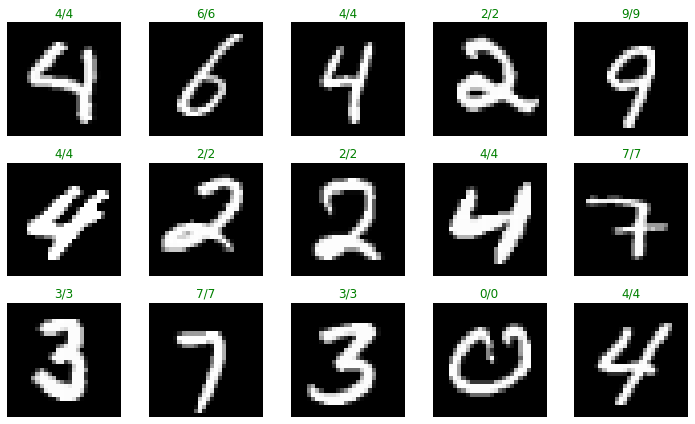

In [ ]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        preds = model(img.unsqueeze(0).to(device))
        pred = torch.argmax(preds, axis=1)[0].item()
        plt.imshow(img.squeeze(0), cmap='gray')
        plt.axis("off")
        plt.title(f'{label}/{pred}', color = "red" if label != pred else "green")
plt.tight_layout()
plt.show()

> ⚡ Existen muchas formas de evaluar un clasificador, puedes encontrar más sobre este tema en el siguiente [post](https://sensioai.com/blog/016_metricas_clasficiacion).

Ahora que ya sabes como hacer un clasificador de imágenes con el dataset MNIST, ¿te ves capaz de hacer clasificadores para otros datasets? [Aquí](https://pytorch.org/docs/stable/torchvision/datasets.html) tienes unos cuantos con los que empezar a jugar.

## Resumen

En este psot hemos presentado las principales tareas del campo de la visión artificial. Este campo ha vivido un resurgimiento en los años recientes gracias al *boom* del `deep learning` ya que las `redes neuronales convolucionales` son capaces de llevar a cabo muchas tareas con buenas prestaciones e incluso nuevas tareas han aparecido gracias a esta tecnología. Hemos visto un ejemplo de la tarea más sencilla: la clasificación de imágenes, en la que simplemente tenemos que asignar una etiqueta dada una imagen. En futuros posts veremos otras tareas más interesantes como la detección de objetos o la segmentación de imágenes.